#### Zindi Challenge
##### Urban Air Pollution Prediction
This project involves Unsupervised Learning and Supervised Learning methods

#### Load the datasets

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
#import os; os.chdir('C:\\Users\\Administrator\\Desktop\\Ngao')
# Load the datasets
train = pd.read_csv(r"Train.csv")
train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = pd.read_csv(r"Test.csv")
test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


#### Data Inspection

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 77 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      16136 non-null  object 
 1   Date                                                 16136 non-null  object 
 2   Place_ID                                             16136 non-null  object 
 3   precipitable_water_entire_atmosphere                 16136 non-null  float64
 4   relative_humidity_2m_above_ground                    16136 non-null  float64
 5   specific_humidity_2m_above_ground                    16136 non-null  float64
 6   temperature_2m_above_ground                          16136 non-null  float64
 7   u_component_of_wind_10m_above_ground                 16136 non-null  float64
 8   v_component_of_wind_10m_above_ground                 16136 non-nul

##### Drop coolumns with the highest proportion of missing values

In [7]:
train = train.drop(columns=['L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle'], axis=1)

In [8]:
test = test.drop(columns=['L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle'], axis=1)

##### We impute missing values for columns with a smaller proportion of missing values with the central tendency statistics

##### We create a function that imputes missing values in all numeric columns with their associated mean

In [9]:
def impute_missing_with_mean(df):
    """
    Impute all numeric columns with their mean values.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with missing values.
    
    Returns:
        pd.DataFrame: New DataFrame with missing values replaced by column means.
    """
    # Compute mean only for numeric columns
    numeric_cols = df.select_dtypes(include='number').columns

    # Fill missing values with the mean of each column
    df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

    return df


In [10]:
train = impute_missing_with_mean(train)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [12]:
test = impute_missing_with_mean(test)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 70 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      16136 non-null  object 
 1   Date                                                 16136 non-null  object 
 2   Place_ID                                             16136 non-null  object 
 3   precipitable_water_entire_atmosphere                 16136 non-null  float64
 4   relative_humidity_2m_above_ground                    16136 non-null  float64
 5   specific_humidity_2m_above_ground                    16136 non-null  float64
 6   temperature_2m_above_ground                          16136 non-null  float64
 7   u_component_of_wind_10m_above_ground                 16136 non-null  float64
 8   v_component_of_wind_10m_above_ground                 16136 non-nul

#### Descriptive Statistics

In [14]:
stats = train.select_dtypes(include='number').describe().T

In [16]:
stats

,count,mean,std,min,25%,50%,75%,max
target,30557.0,61.148045,46.861309,1.000000,25.000000,50.000000,80.000000,8.150000e+02
target_min,30557.0,29.025866,33.119775,1.000000,5.000000,15.000000,44.000000,4.380000e+02
target_max,30557.0,117.992234,100.417713,1.000000,60.000000,91.000000,155.000000,9.990000e+02
target_variance,30557.0,7983.756300,48630.902037,0.000000,1064.920000,2395.350000,5882.550000,1.841490e+06
target_count,30557.0,125.831135,146.581856,2.000000,44.000000,72.000000,150.000000,1.552000e+03
...,...,...,...,...,...,...,...,...
L3_SO2_cloud_fraction,30557.0,0.213883,0.137997,0.000000,0.108424,0.213883,0.295409,6.181760e-01
L3_SO2_sensor_azimuth_angle,30557.0,-13.667626,66.350167,-111.997123,-94.968083,-13.667626,67.355233,8.054407e+01
L3_SO2_sensor_zenith_angle,30557.0,35.590916,16.559062,0.000000,25.665970,35.590916,48.493813,6.611129e+01
L3_SO2_solar_azimuth_angle,30557.0,-123.697777,62.824993,-179.880630,-163.148978,-145.556352,-123.697777,1.797761e+02


In [15]:
stacs = train.select_dtypes(include='object').describe().T
stacs

,count,unique,top,freq
Place_ID X Date,30557,30557,010Q650 X 2020-01-02,1
Date,30557,94,2020-02-04,334
Place_ID,30557,340,YSIXKFZ,94


In [16]:
stats1 = test.select_dtypes(include='number').describe().T
stats1

,count,mean,std,min,25%,50%,75%,max
precipitable_water_entire_atmosphere,16136.0,14.202076,9.377060,0.900000,7.655303,11.600000,18.100000,63.100002
relative_humidity_2m_above_ground,16136.0,71.136312,18.357542,6.700000,60.000000,74.800003,85.500000,100.000000
specific_humidity_2m_above_ground,16136.0,0.005513,0.003261,0.000279,0.003401,0.004610,0.006598,0.020180
temperature_2m_above_ground,16136.0,8.651834,8.033144,-26.628958,3.201305,7.482545,13.834132,34.851022
u_component_of_wind_10m_above_ground,16136.0,0.660754,2.854376,-15.837668,-1.040559,0.402638,2.167810,19.889325
...,...,...,...,...,...,...,...,...
L3_SO2_cloud_fraction,16136.0,0.216980,0.140769,0.000000,0.107538,0.216980,0.299788,0.613139
L3_SO2_sensor_azimuth_angle,16136.0,-13.231455,64.370579,-110.301204,-93.274032,-13.231455,66.432687,80.019432
L3_SO2_sensor_zenith_angle,16136.0,34.894186,16.194746,0.000000,25.474730,34.894186,47.302635,66.216644
L3_SO2_solar_azimuth_angle,16136.0,-122.992436,65.660490,-179.953644,-164.097459,-147.742835,-122.992436,179.884901


In [17]:
stacs1 = test.select_dtypes(include='object').describe().T
stacs1

,count,unique,top,freq
Place_ID X Date,16136,16136,0OS9LVX X 2020-01-02,1
Date,16136,94,2020-03-23,176
Place_ID,16136,179,0OS9LVX,94


#### Exploratory Data Analysis

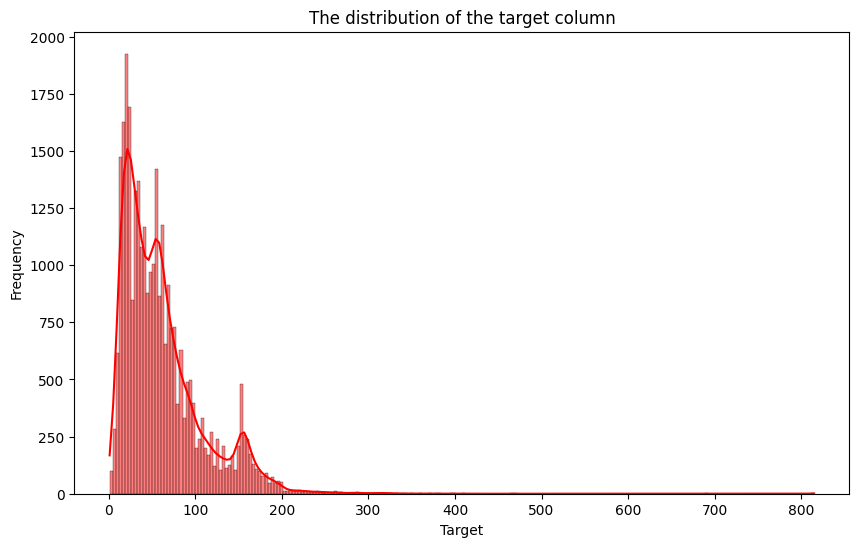

In [18]:
# Plot the target column
plt.figure(figsize=(10,6))
sns.histplot(train['target'], kde=True, color='red')
plt.title('The distribution of the target column')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [19]:
numeric_cols = train[['precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground',
                      'u_component_of_wind_10m_above_ground','v_component_of_wind_10m_above_ground',
                      'L3_NO2_sensor_altitude','L3_O3_solar_azimuth_angle',
                      'L3_CO_cloud_height','L3_CO_H2O_column_number_density',
                      'L3_HCHO_cloud_fraction','L3_HCHO_tropospheric_HCHO_column_number_density',
                      'L3_CLOUD_cloud_top_pressure',
                      'L3_AER_AI_absorbing_aerosol_index',
                      'L3_SO2_solar_zenith_angle']]

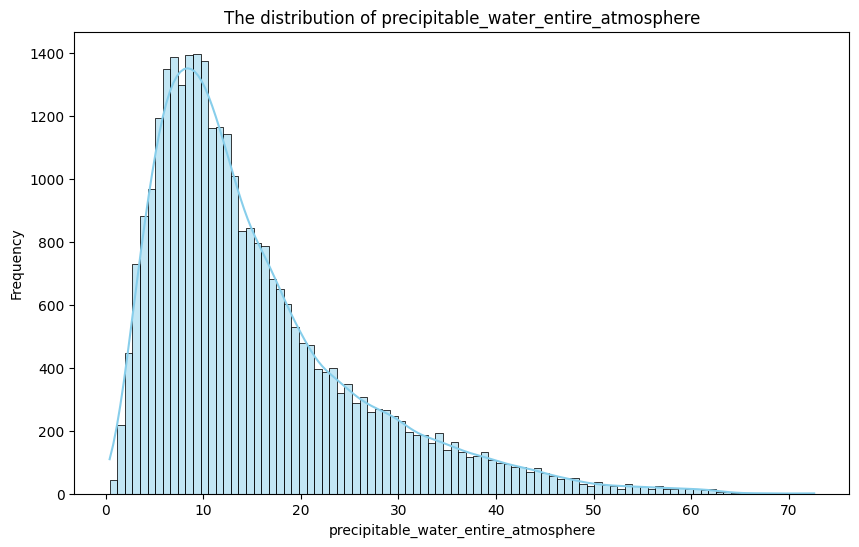

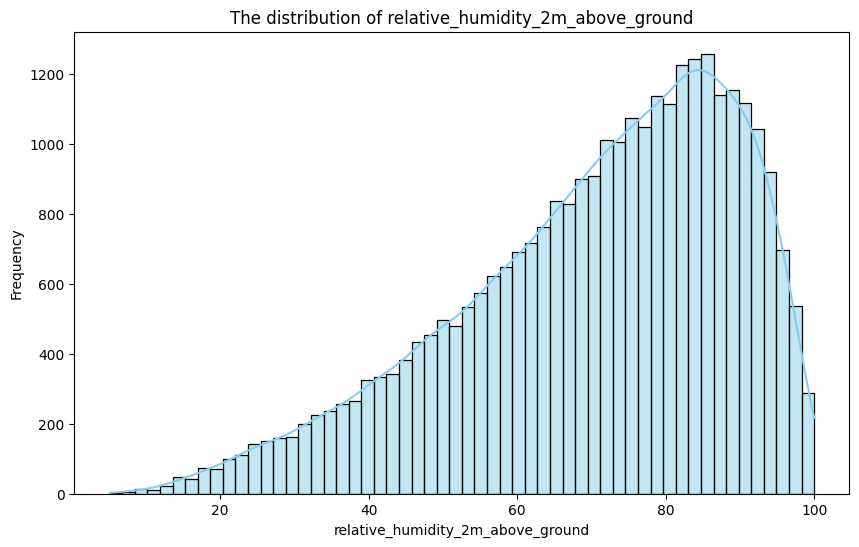

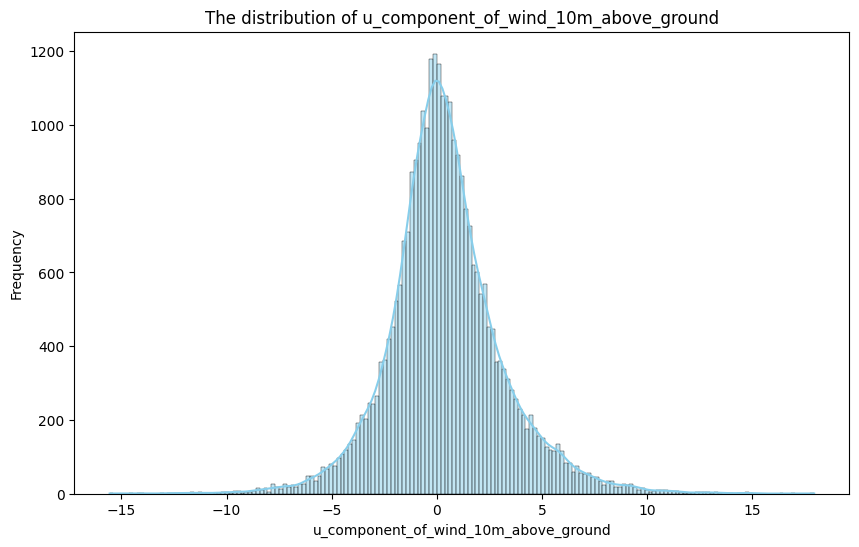

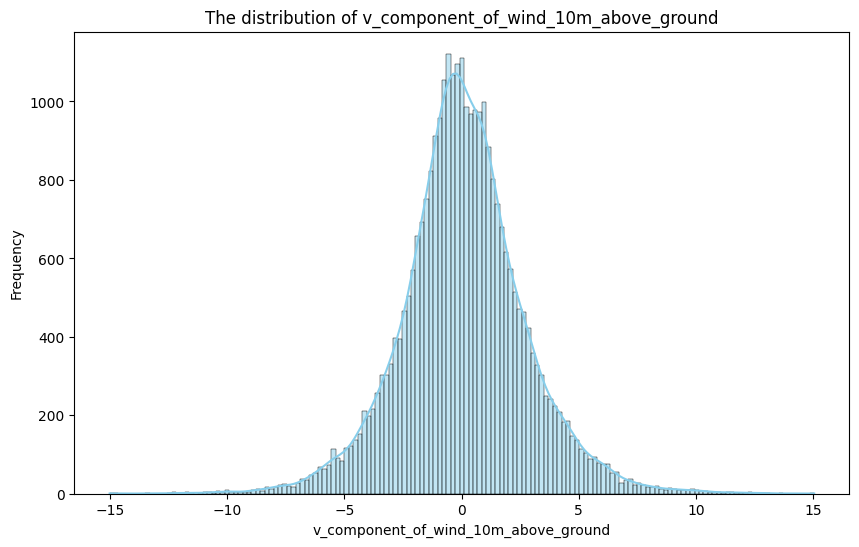

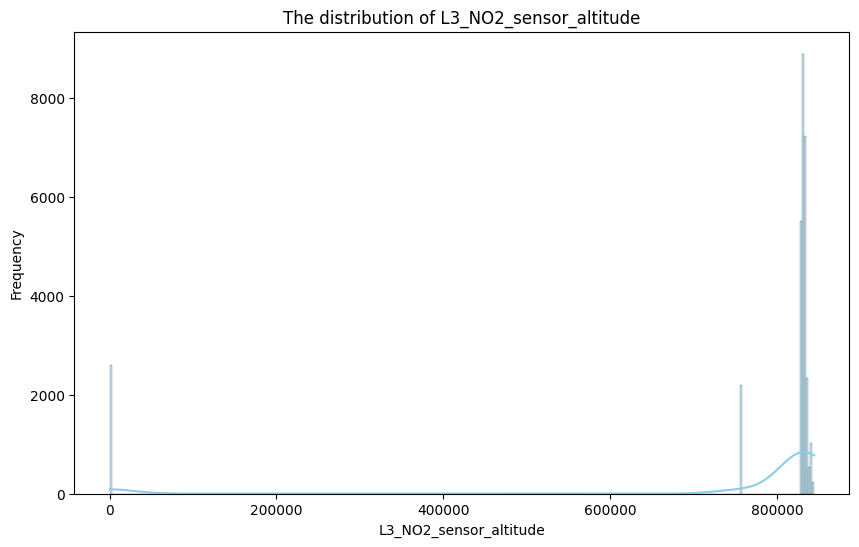

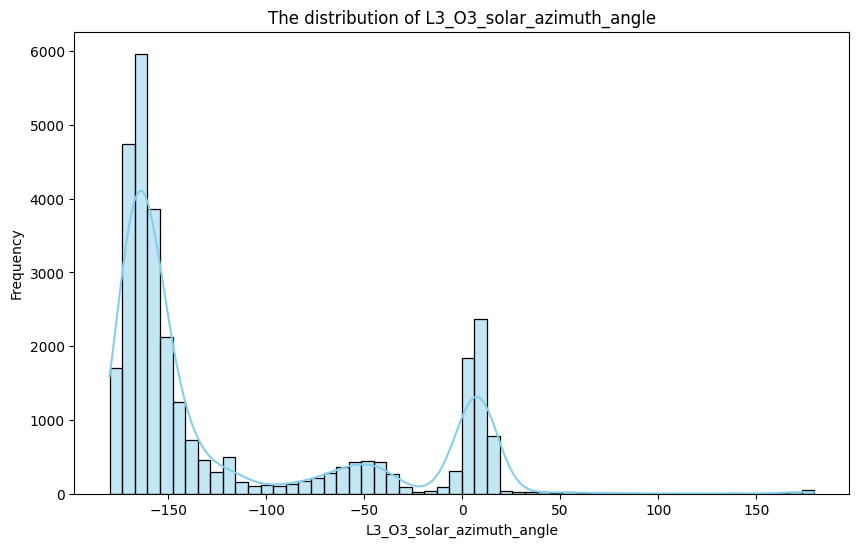

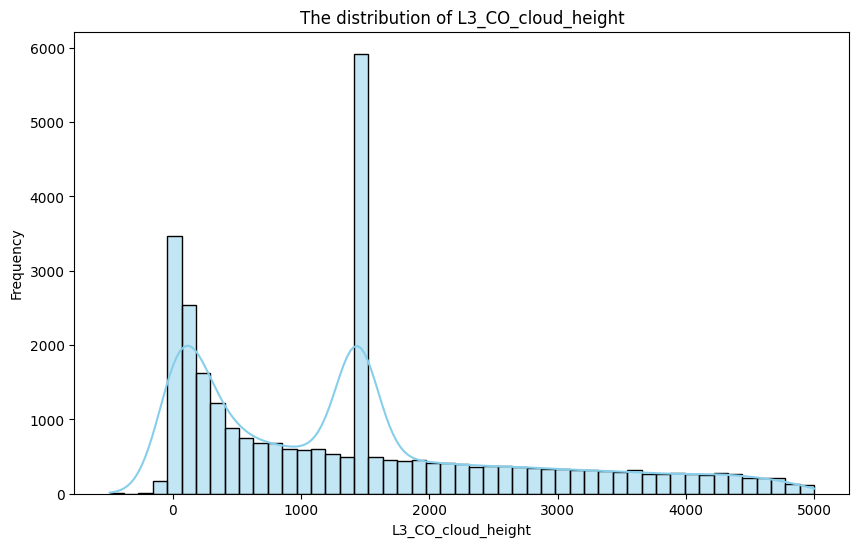

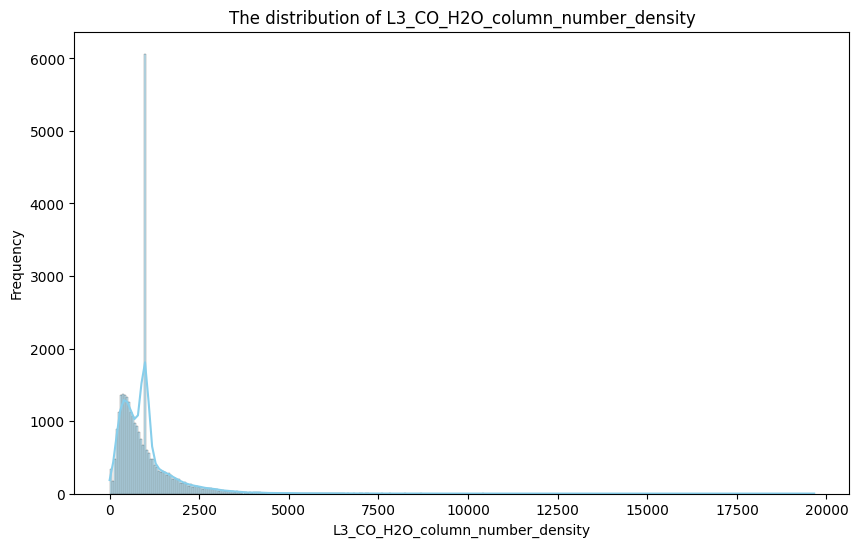

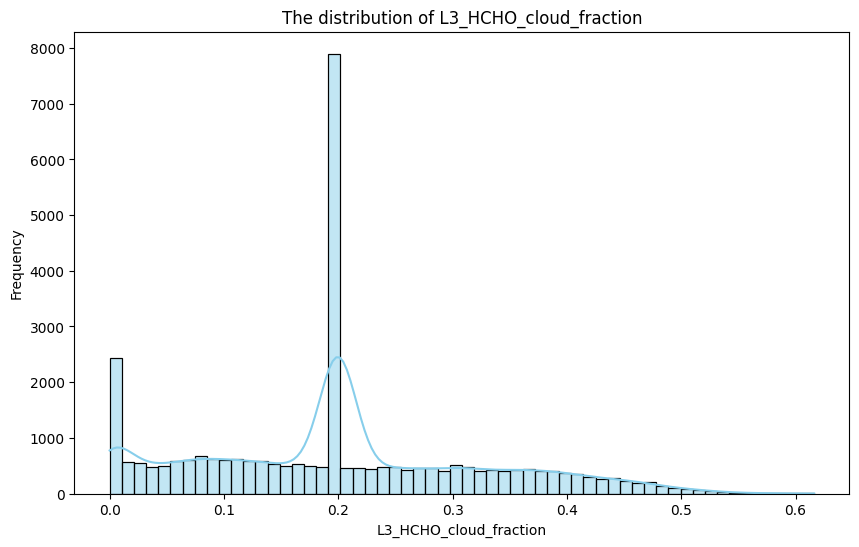

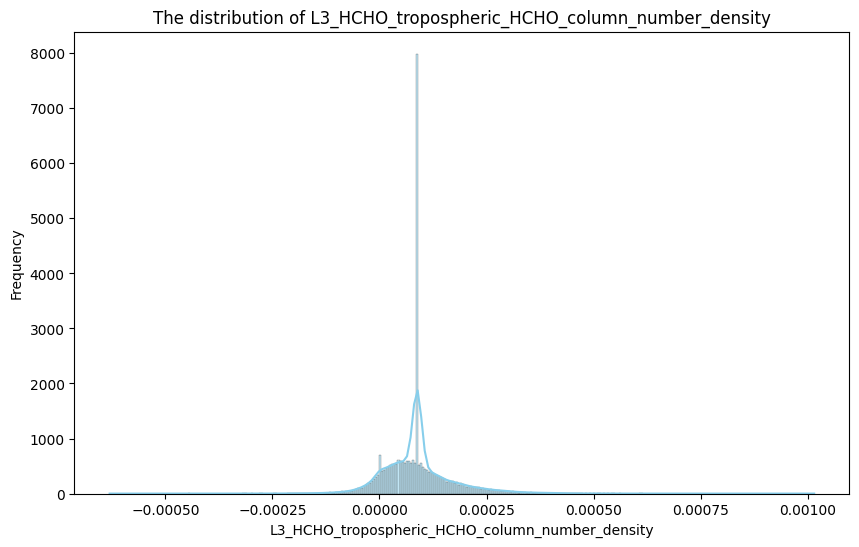

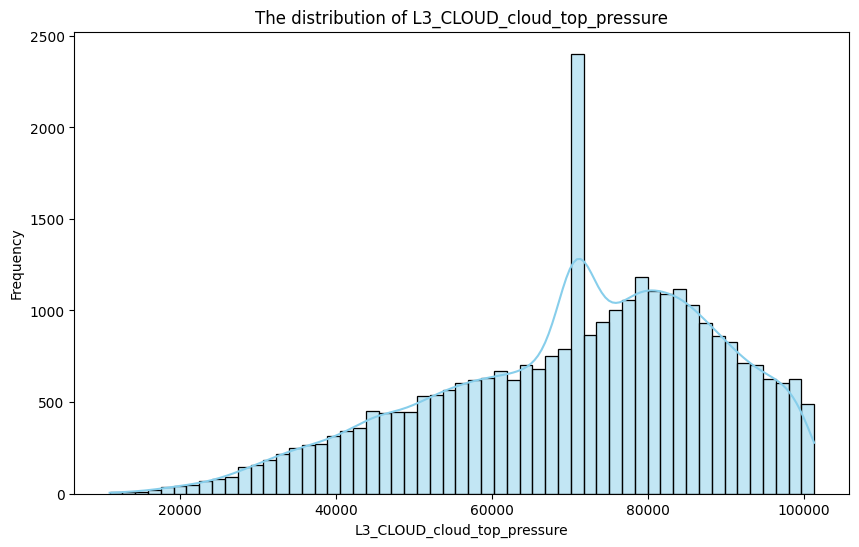

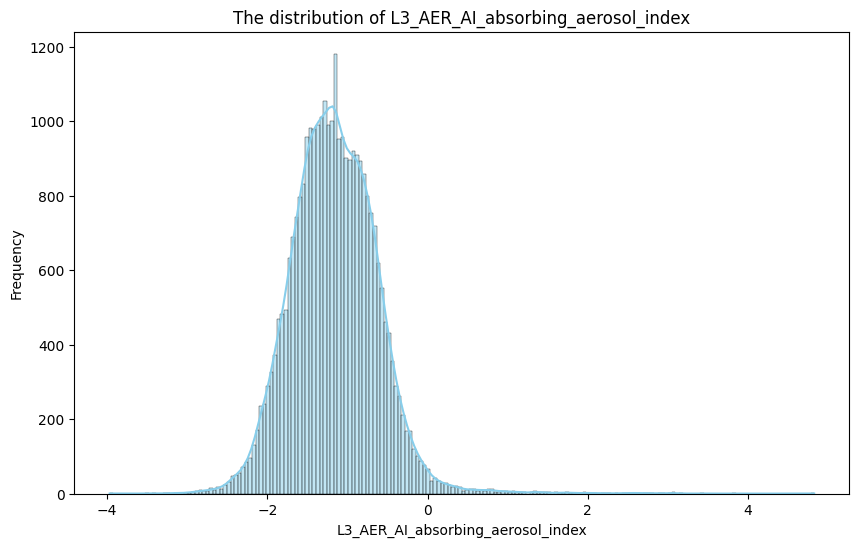

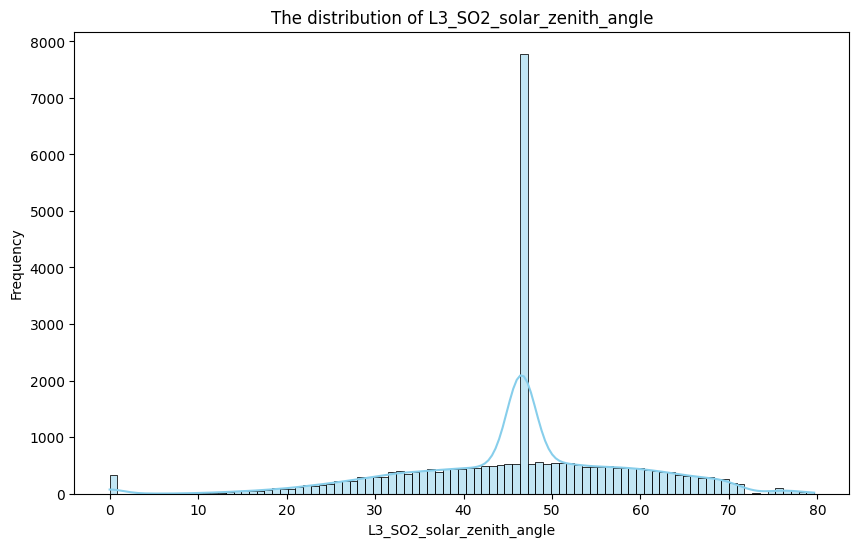

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(numeric_cols[col], kde=True, color='skyblue')
    plt.title(f"The distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.show()

#### Clustering

##### K-Means Clustering

##### Selection of the features to be included in the analysis

In [21]:
train_data = train[['target',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_cloud_fraction',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_AER_AI_sensor_altitude', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_SO2_slant_column_number_density',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction']]

In [22]:
test_data = test[['precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_cloud_fraction',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_AER_AI_sensor_altitude', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_SO2_slant_column_number_density',
       'L3_SO2_absorbing_aerosol_index','L3_SO2_cloud_fraction']]

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [24]:
X_train = train_data.drop(columns='target', axis=1)
y_train = train_data['target']

In [25]:
print(f"The shape of the X_train : {X_train.shape}")
print("*" * 50)
print(f"The shape of the y_train : {y_train.shape}")

The shape of the X_train : (30557, 37)
**************************************************
The shape of the y_train : (30557,)


In [53]:
# Feature scaling - Important for distance based algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(test_data)

In [27]:
# Elbow method to find optimal K
inertias = []
silhouette_scores = []
K_range = range(2, 38)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

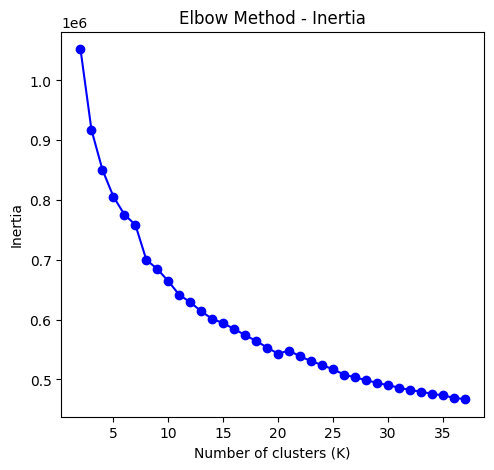

In [28]:
# Plot Inertia vs. K (elbow method)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

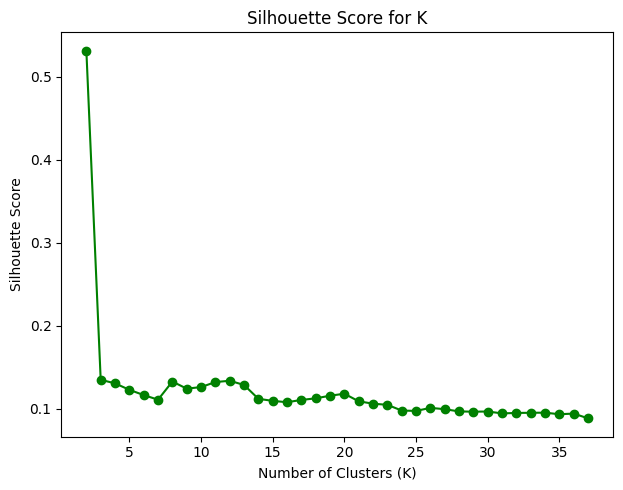

In [44]:
# Plot Silhouette Score vs. K
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K')
plt.tight_layout()
plt.show()

In [29]:
# Apply K-means with optimal K (based on Elbow method and Silhouette Score)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)
X_train_scaled['Cluster'] = clusters

In [30]:
X_train_scaled['Cluster'].unique()

array([0, 2, 1], dtype=int32)

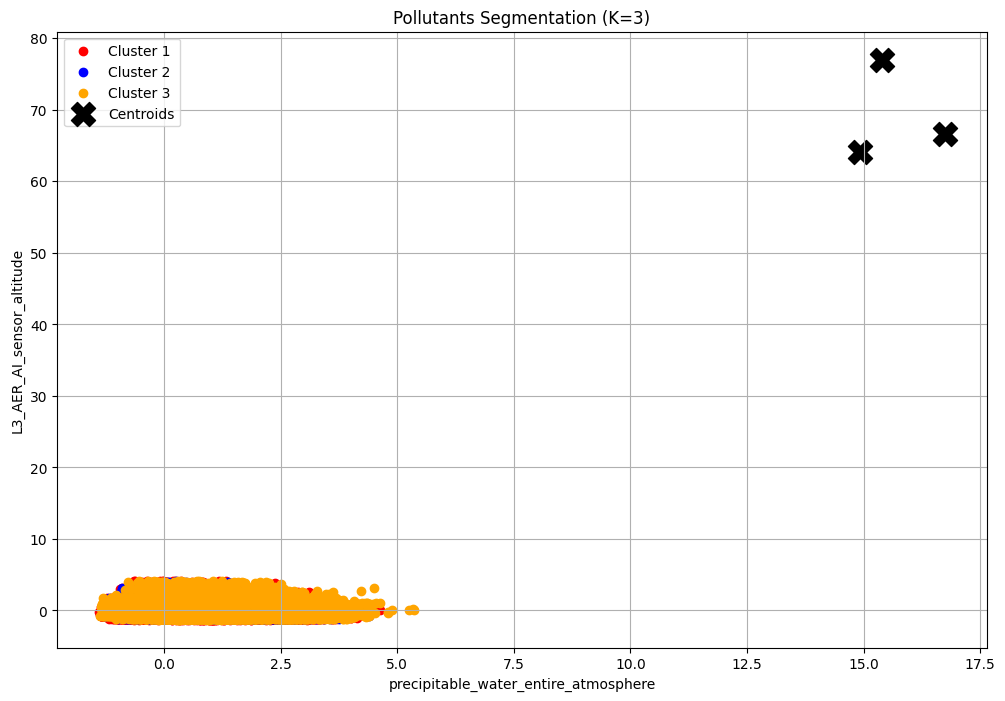

In [31]:
# Visualize the Clusters
plt.figure(figsize=(12,8))
colors = ['red', 'blue', 'orange', 'purple']
for i in range(optimal_k):
    plt.scatter(X_train_scaled['precipitable_water_entire_atmosphere'][X_train_scaled['Cluster'] == i],
                X_train_scaled['L3_AER_AI_sensor_altitude'][X_train_scaled['Cluster'] == i],
                label = f"Cluster {i+1}",
                color = colors[i])
# Add cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], s=300, c='black', label ='Centroids', marker='X')
plt.xlabel('precipitable_water_entire_atmosphere')
plt.ylabel('L3_AER_AI_sensor_altitude')
plt.title(f"Pollutants Segmentation (K={optimal_k})")
plt.grid(True)
plt.legend()
plt.show()

In [32]:
# Evaluate the clustering performance
print(f"Final Inertia (Total-within Clusters): {kmeans.inertia_:.2f}")
silhou_score = silhouette_score(X_train_scaled, clusters)
print(f"Silhouette Score: {silhou_score:.4f}")

Final Inertia (Total-within Clusters): 917334.65
Silhouette Score: 0.1593


In [33]:
# Display Cluster assignments
print("\nCluster Assignments: ")
print(X_train_scaled.sort_values(by='Cluster'))


Cluster Assignments: 
       precipitable_water_entire_atmosphere  \
30549                              0.289816   
30548                              0.065274   
30547                             -0.746958   
30546                             -0.812309   
15                                -0.533506   
...                                     ...   
30541                             -0.140557   
30540                              0.449484   
30539                              0.476935   
30543                             -0.028285   
17                                 0.196257   

       relative_humidity_2m_above_ground  temperature_2m_above_ground  \
30549                          -0.029390                     0.148037   
30548                           0.199242                    -0.306460   
30547                          -0.438799                    -0.476848   
30546                           0.162023                    -0.644774   
15                             -2.900573       

#### Hierarchical Clustering

##### Performing Hierarchical Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering


In [35]:
# Apply appglomerative clustering with 3 clusters
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
X_train_scaled['Cluster'] = model.fit_predict(X_train_scaled)

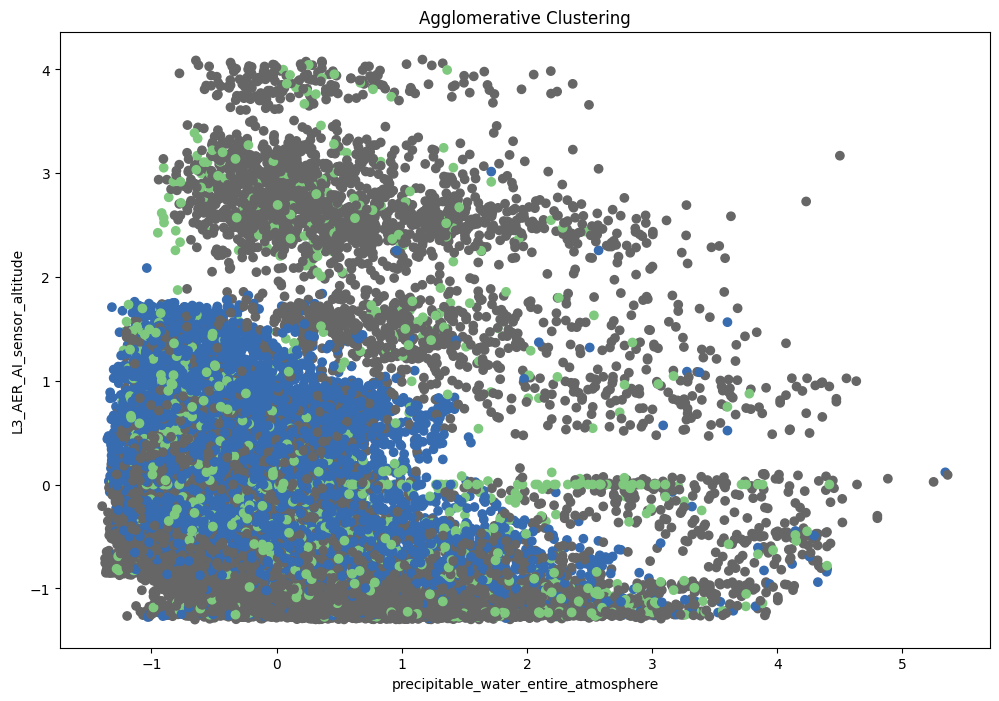

In [36]:
# Visualize
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled['precipitable_water_entire_atmosphere'], X_train_scaled['L3_AER_AI_sensor_altitude'], c=X_train_scaled['Cluster'], cmap='Accent')
plt.xlabel('precipitable_water_entire_atmosphere')
plt.ylabel('L3_AER_AI_sensor_altitude')
plt.title('Agglomerative Clustering')
plt.show()

Compared to K-Means Clustering, Hierarchical Clustering is more distinct than K-means.

In [60]:
# Plot a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
# linkage matrix
linked = linkage(X_train_scaled, method='ward')

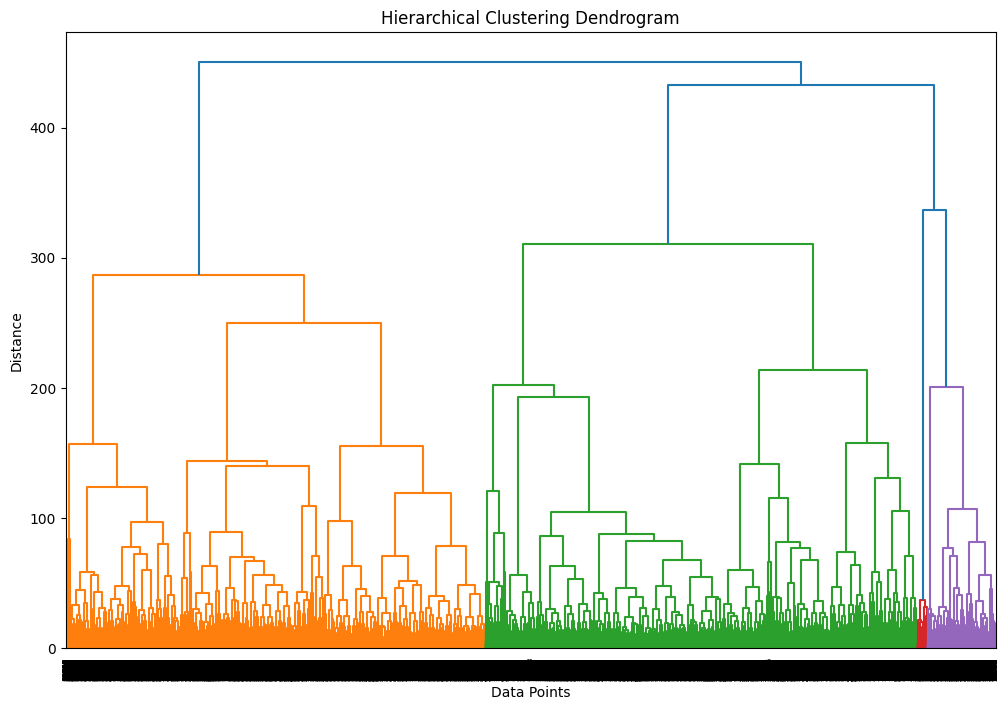

In [62]:
# Plot the dendrogram
plt.figure(figsize=(12,8))
dendrogram(linked,
           labels = range(1, len(X_train_scaled)+1),
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [37]:
# Evaluation with the Silhouette score
labels = model.fit_predict(X_train_scaled)
silhou_score = silhouette_score(X_train_scaled, labels)
print(f"Silhouette Score: {silhou_score:.4f}")

Silhouette Score: 0.1161


Comparison in terms of Silhouette score for the 2 types of clustering, K-Means Clustering recorded a higher score than the Hierarchical Clustering.

#### Supervised Learning - Prediction of PM2.5 (the target variable)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [56]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
target = linear_model.predict(test_data)
print(target)

[38.36361395 20.83527886 20.64776738 ... 33.88310911 64.52048727
 60.59011605]


In [62]:
submission = pd.DataFrame({'Place_ID X Date': test['Place_ID X Date'],
                           'target': target})

In [63]:
submission.sample(10)

,Place_ID X Date,target
9386,MDMU646 X 2020-02-11,50.913460
11499,RKAR1AR X 2020-03-09,24.907001
5836,DK41FJZ X 2020-01-07,55.783998
14556,XAW49QB X 2020-01-10,72.283293
14428,WRZ2ZFG X 2020-03-10,69.226552
12885,TF8GL9A X 2020-01-18,95.969120
1988,6UUG3GR X 2020-01-10,66.810385
8305,JWR64XG X 2020-01-13,49.968964
8535,K39BZEQ X 2020-03-01,41.269126
5322,CMTJVSQ X 2020-03-17,40.627915


In [60]:
submission.to_csv('Submission_File.csv', index=False)

In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
target = rf_model.predict(test_data)

In [23]:
submission = pd.DataFrame({'Place_ID X Date': test['Place_ID X Date'],
                           'target': target})

In [24]:
submission.to_csv('SubmissionFile1.csv', index=False)

In [ ]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05,
    max_depth=6, subsample=0.8,
    colsample_bytree=0.8, random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(test_data)


In [44]:
target = xgb_model.predict(test_data)
submission = pd.DataFrame({'Place_ID X Date': test['Place_ID X Date'],
                           'target': target})
submission.to_csv('SubmissionFile2.csv', index=False)

In [46]:
#LightGBM
lgb_model = LGBMRegressor(
    n_estimators=300, learning_rate=0.05,
    num_leaves=31, subsample=0.8,
    colsample_bytree=0.8, random_state=42
)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(test_data)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 30557, number of used features: 37
[LightGBM] [Info] Start training from score 61.148045


In [47]:
target = lgb_model.predict(test_data)
submission = pd.DataFrame({'Place_ID X Date': test['Place_ID X Date'],
                           'target': target})
submission.to_csv('SubmissionFile3.csv', index=False)

In [49]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    max_depth=5,       # limits tree depth to avoid overfitting
    min_samples_split=10,
    random_state=42
)

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(test_data)

In [50]:
target = dt_model.predict(test_data)
submission = pd.DataFrame({'Place_ID X Date': test['Place_ID X Date'],
                           'target': target})
submission.to_csv('SubmissionFile4.csv', index=False)

In [51]:
# Support Vector Regressor
# Import libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Use a pipeline to scale features (important for SVR)
svr_model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1)
)

# Fit the model
svr_model.fit(X_train, y_train)

# Predict on test data
svr_pred = svr_model.predict(test_data)

In [52]:
target = svr_model.predict(test_data)
submission = pd.DataFrame({'Place_ID X Date': test['Place_ID X Date'],
                           'target': target})
submission.to_csv('SubmissionFile5.csv', index=False)